<a href="https://colab.research.google.com/github/AdelaideUniversityMathSciences/MathsForAI/blob/main/Code/compareOptimisationAlgos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

This code is borrowed from https://deeplearningmath.org/optimization-algorithms.html. 

- Run the code, to see how vanilla GD, GD with momentum, and GD with Nesterov momentum work on Rosenbrock's (non-convex) function.
- The learning rate decays exponentially over time here. Switch it off. What happens to each method? Play with the learning rate.

This code as written implements "deterministic" GD, rather than SGD. Let's change the problem to something we can apply the stochastic versions of these methods to, and also to something more resembling machine learning.

Change the cost function to a the appropriate least-squares cost function for simple linear regression applied to the 3 data points (1,1), (2,2), (3,3). (Couldn't get much simpler).

Then, change the function `grad(t)` to do simple online SGD (i.e., a minibatch size of 1). Mess around with all the parameters in the 'Initialization' cell until you get something that makes nice-looking plots. Compare the convergence of vanilla SGD, SGD with momentum, and Nesterov momentum.

In [2]:
# Rosenbrock's banana function
f = lambda t: (1 - t[0])**2 + 100*(t[1] - t[0]**2)**2


In [3]:
def grad(t):
    dx = -2*(1 - t[0]) - 4*100*t[0]*(t[1] - (t[0]**2))
    dy = 2*100*(t[1] - (t[0]**2))

    return np.array([dx, dy])

def GradientDescent(f, grad, t, alpha, gamma, niter=100000):
    g = grad(t)
    norm = np.linalg.norm(g)
    d = -g/norm
    t_seq = [t]
    d_seq = [d]

    for _ in range(niter):
        alpha *= gamma
        t = t + alpha*d
        t_seq.append(t)
        
        g = grad(t)
        norm = np.linalg.norm(g)
        d = -g/norm
        d_seq.append(d)
        
    t_seq = np.array(t_seq)
    d_seq = np.array(d_seq)
    return t_seq, d_seq

def MomentumGradientDescent(f, grad, t, alpha, gamma, beta, niter=100000):
    v = np.zeros(t.shape[0])
    t_seq = [t]
    v_seq = [v]

    for _ in range(niter):
        g = grad(t)
        norm = np.linalg.norm(g)
        v = beta*v - alpha*g/norm
        v_seq.append(v)

        alpha *= gamma
        t = t + v
        t_seq.append(t)

    t_seq = np.array(t_seq)
    v_seq = np.array(v_seq)
    return t_seq, v_seq  

def NesterovMomentumGradientDescent(f, grad, t, alpha, gamma, beta, niter=100000):
    g = grad(t)
    norm = np.linalg.norm(g)
    v = np.zeros(t.shape[0])
    t_seq = [t]
    v_seq = [v]
    

    for _ in range(niter):
        g = grad(t + beta*v)
        norm = np.linalg.norm(g)
        v = beta*v - alpha*g/norm
        v_seq.append(v)
        
        alpha *= gamma
        t = t + v
        t_seq.append(t)
        
    t_seq = np.array(t_seq)
    v_seq = np.array(v_seq)
    return t_seq, v_seq 



In [4]:
# Initialization
alpha_init = 0.2 
gamma = 0.9
beta = 0.8
t_init = np.array([-1.25, 0.5]) 
niter = 100000 

t1_range = np.arange(-1.5, 1.75, 0.01)
t2_range = np.arange(-0.5, 1.5, 0.01)

A = np.meshgrid(t1_range, t2_range)
Z = f(A)


In [5]:
t_seq_gd, d_seq_gd = GradientDescent(f, grad, t_init, alpha_init, gamma, niter)
t_seq_mgd, d_seq_mgd = MomentumGradientDescent(f, grad, t_init, alpha_init, gamma, beta, niter)
t_seq_nmgd, d_seq_nmgd = NesterovMomentumGradientDescent(f, grad, t_init, alpha_init, gamma, beta, niter)


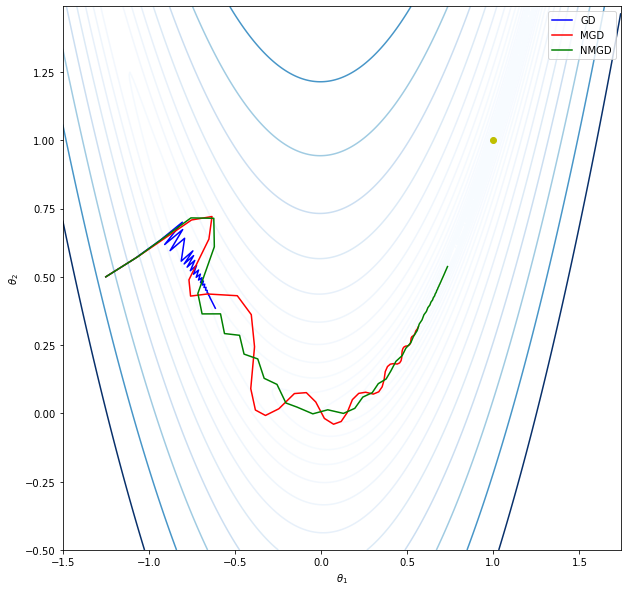

In [6]:
plt.figure(figsize=(10,10))
plt.contour(t1_range, t2_range, Z, levels=np.exp(np.arange(-10, 6, 0.5)), cmap='Blues')
plt.plot(t_seq_gd[:, 0], t_seq_gd[:, 1], '-b', label='GD')
plt.plot(t_seq_mgd[:, 0], t_seq_mgd[:, 1], '-r', label='MGD')
plt.plot(t_seq_nmgd[:, 0], t_seq_nmgd[:, 1], '-g', label='NMGD')
plt.plot(1, 1, 'oy')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.legend()